In [82]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [83]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

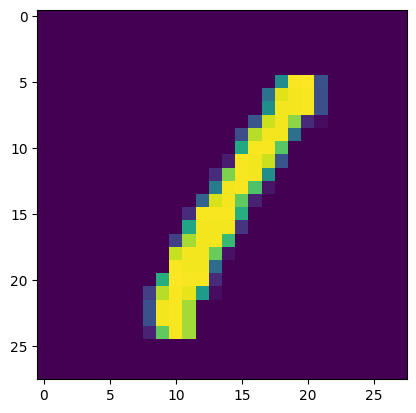

In [87]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [88]:
x_train=x_train/255
x_test=x_test/255

In [101]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [102]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [105]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1217 - accuracy: 0.9639 - val_loss: 0.1137 - val_accuracy: 0.9653
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0843 - accuracy: 0.9745 - val_loss: 0.1050 - val_accuracy: 0.9698
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0628 - accuracy: 0.9807 - val_loss: 0.0927 - val_accuracy: 0.9720
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0941 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0864 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0915 - val_accuracy:

In [106]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [107]:
y_prob

array([[1.78015447e-12, 4.70367745e-10, 4.27062972e-08, ...,
        9.99904931e-01, 1.01875086e-09, 4.03044425e-07],
       [5.46081125e-15, 3.07816883e-10, 9.99999940e-01, ...,
        9.48785129e-21, 4.81076112e-09, 1.12030455e-17],
       [4.69910066e-09, 9.99802589e-01, 8.80624502e-05, ...,
        5.52525780e-05, 5.29640238e-05, 5.91362848e-10],
       ...,
       [2.45291250e-18, 1.96319857e-16, 1.98117069e-17, ...,
        1.06441282e-08, 4.50259517e-11, 1.54294369e-07],
       [2.41783712e-15, 1.56876113e-16, 9.65541873e-18, ...,
        2.11277943e-16, 2.37564350e-08, 9.43251192e-17],
       [2.04210889e-12, 1.16383151e-12, 1.48636745e-12, ...,
        5.55952970e-18, 1.60741212e-13, 2.43588271e-13]], dtype=float32)

In [108]:
y_pred=y_prob.argmax(axis=1)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9776

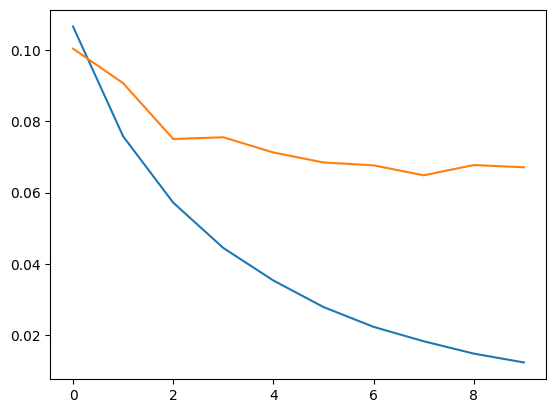

In [110]:
plt.plot(histry.history[('loss')])
plt.plot(histry.history[('val_loss')])

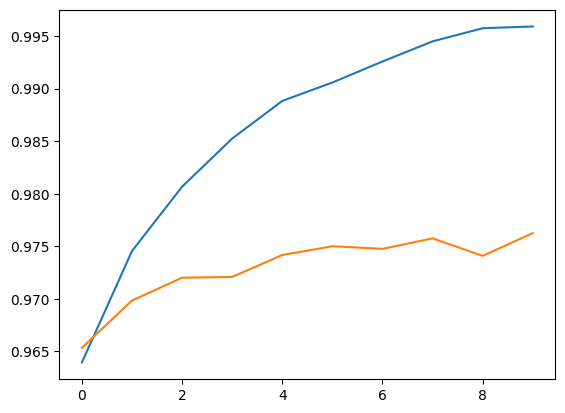

In [113]:
plt.plot(history.history[('accuracy')])
plt.plot(history.history[('val_accuracy')])

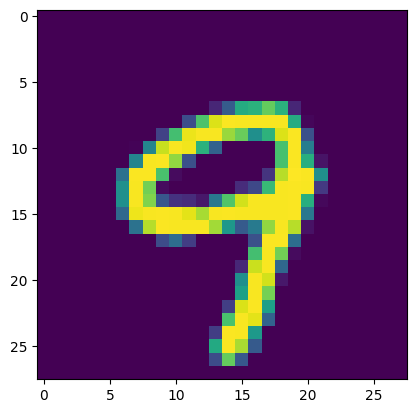

In [134]:
plt.imshow(x_test[58])

In [136]:
model.predict(x_test[58].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([9])